In [ ]:
# Smart Waste Management – Garbage Classification  
## Final Evaluation & Analysis Notebook  

# This notebook contains the complete analysis of both models used for garbage classification:

### **Models Compared**
# - **Baseline CNN** (Input: 64×64, lightweight)
# - **ResNet50 (Transfer Learning)** (Input: 160×160, deep architecture)

### **This notebook includes**
# - Accuracy & loss curves  
# - Confusion matrices  
# - Per-class precision, recall, F1  
# - ROC curves  
# - Precision–Recall curves  
# - Misclassified image visualization  
# - Dataset statistics  
# - Side-by-side model comparison  
# - Single-image prediction demo  
# - Key findings & conclusions  


In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from IPython.display import Image as IPImage, display
from PIL import Image
import warnings

warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')

print("✓ Notebook Started")
print("TensorFlow Version:", tf.__version__)


✓ Notebook Started
TensorFlow Version: 2.20.0


In [ ]:
## 1. Load Evaluation Results  
# The evaluation JSON is generated by `scripts/full_evaluation.py`.


In [2]:
with open('../results/evaluation_report.json', 'r') as f:
    eval_report = json.load(f)

baseline = eval_report['baseline_model']
advanced = eval_report['advanced_model']
comparison = eval_report['comparison']

print("✓ Evaluation report loaded\n")
print("Baseline Accuracy:", baseline['accuracy']*100)
print("ResNet50 Accuracy:", advanced['accuracy']*100)


✓ Evaluation report loaded

Baseline Accuracy: 71.34600877761841
ResNet50 Accuracy: 77.62863636016846


In [ ]:
## 2. Training Curves
# Here we load and display the saved training PNG plots.


Baseline Training Curve:


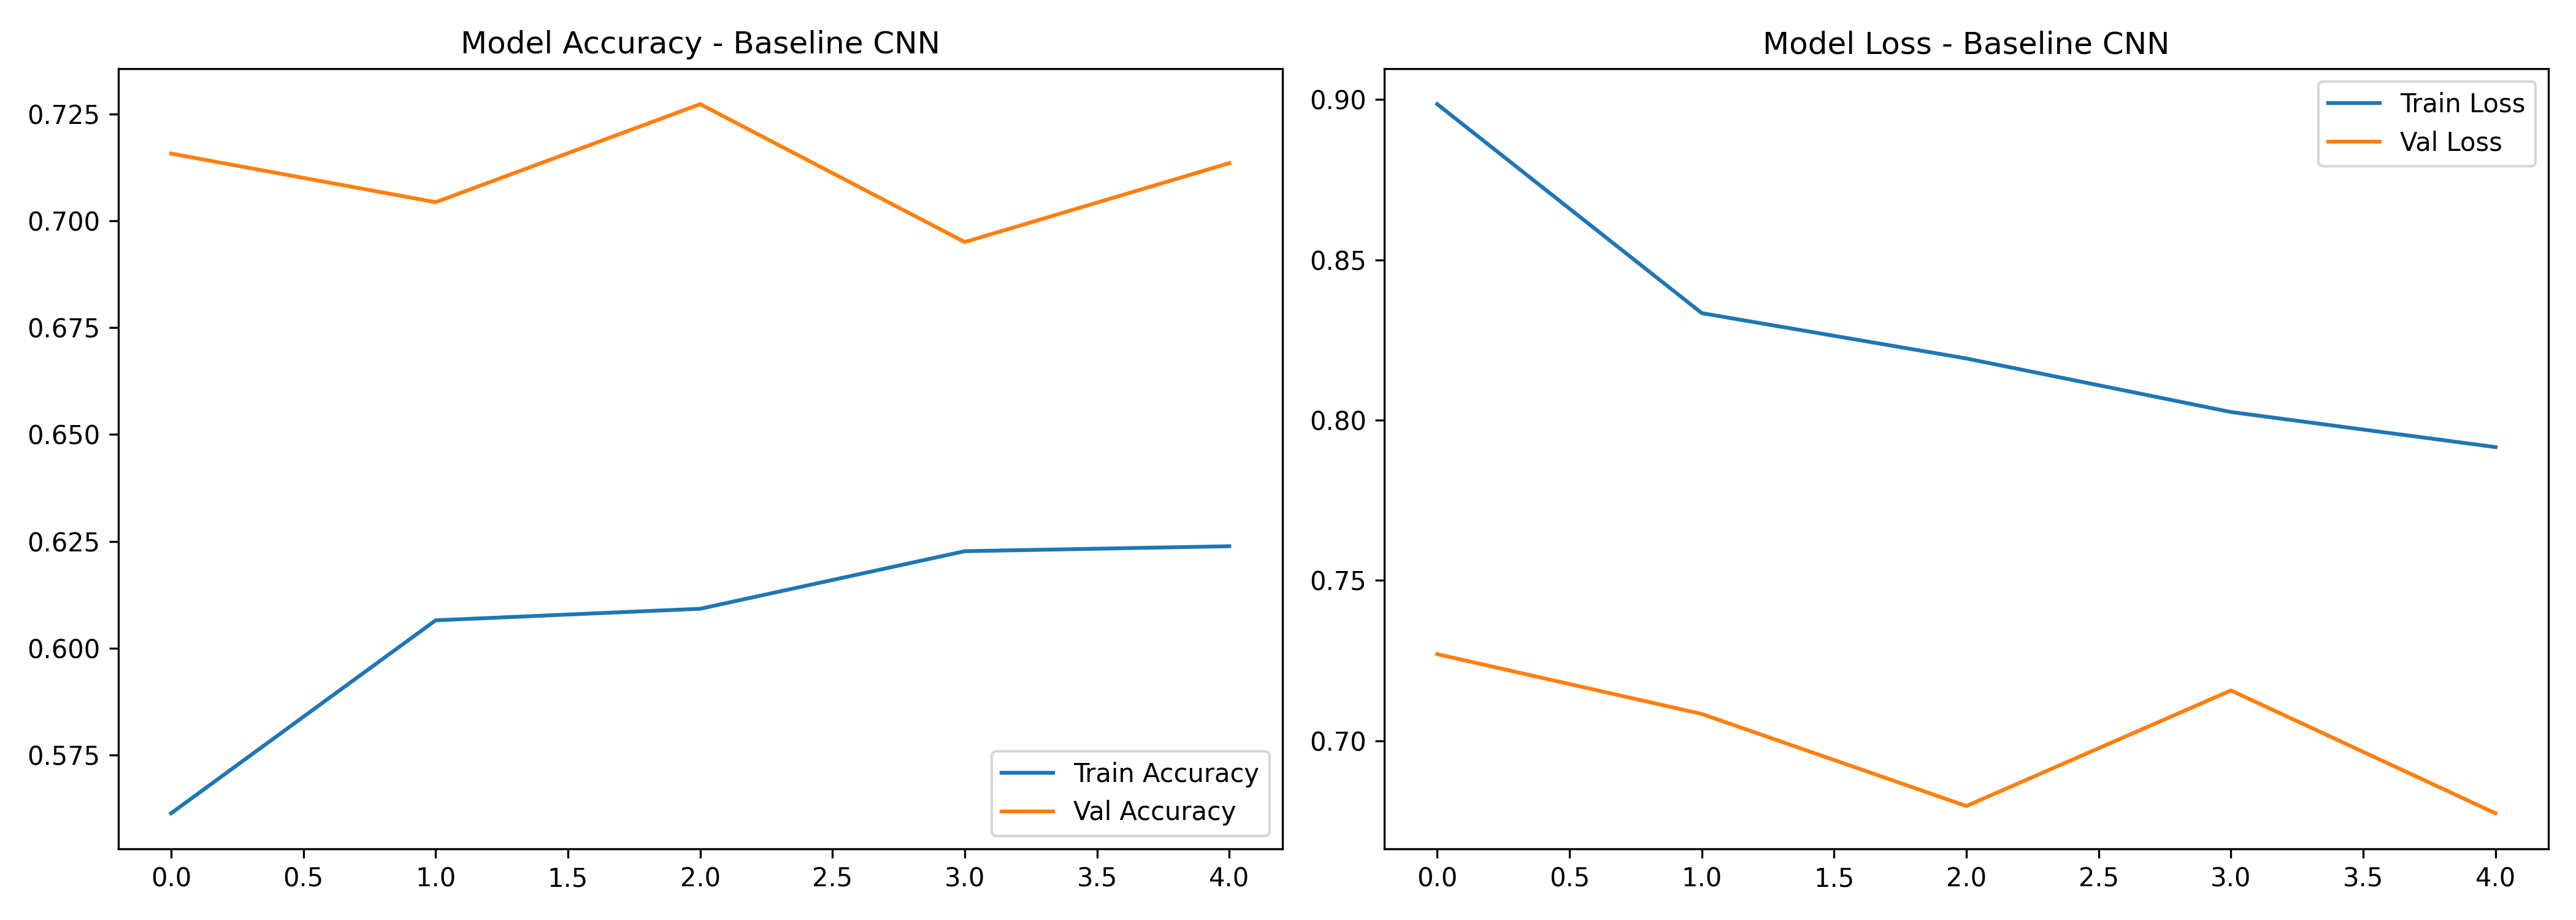

ResNet50 Training Curve:


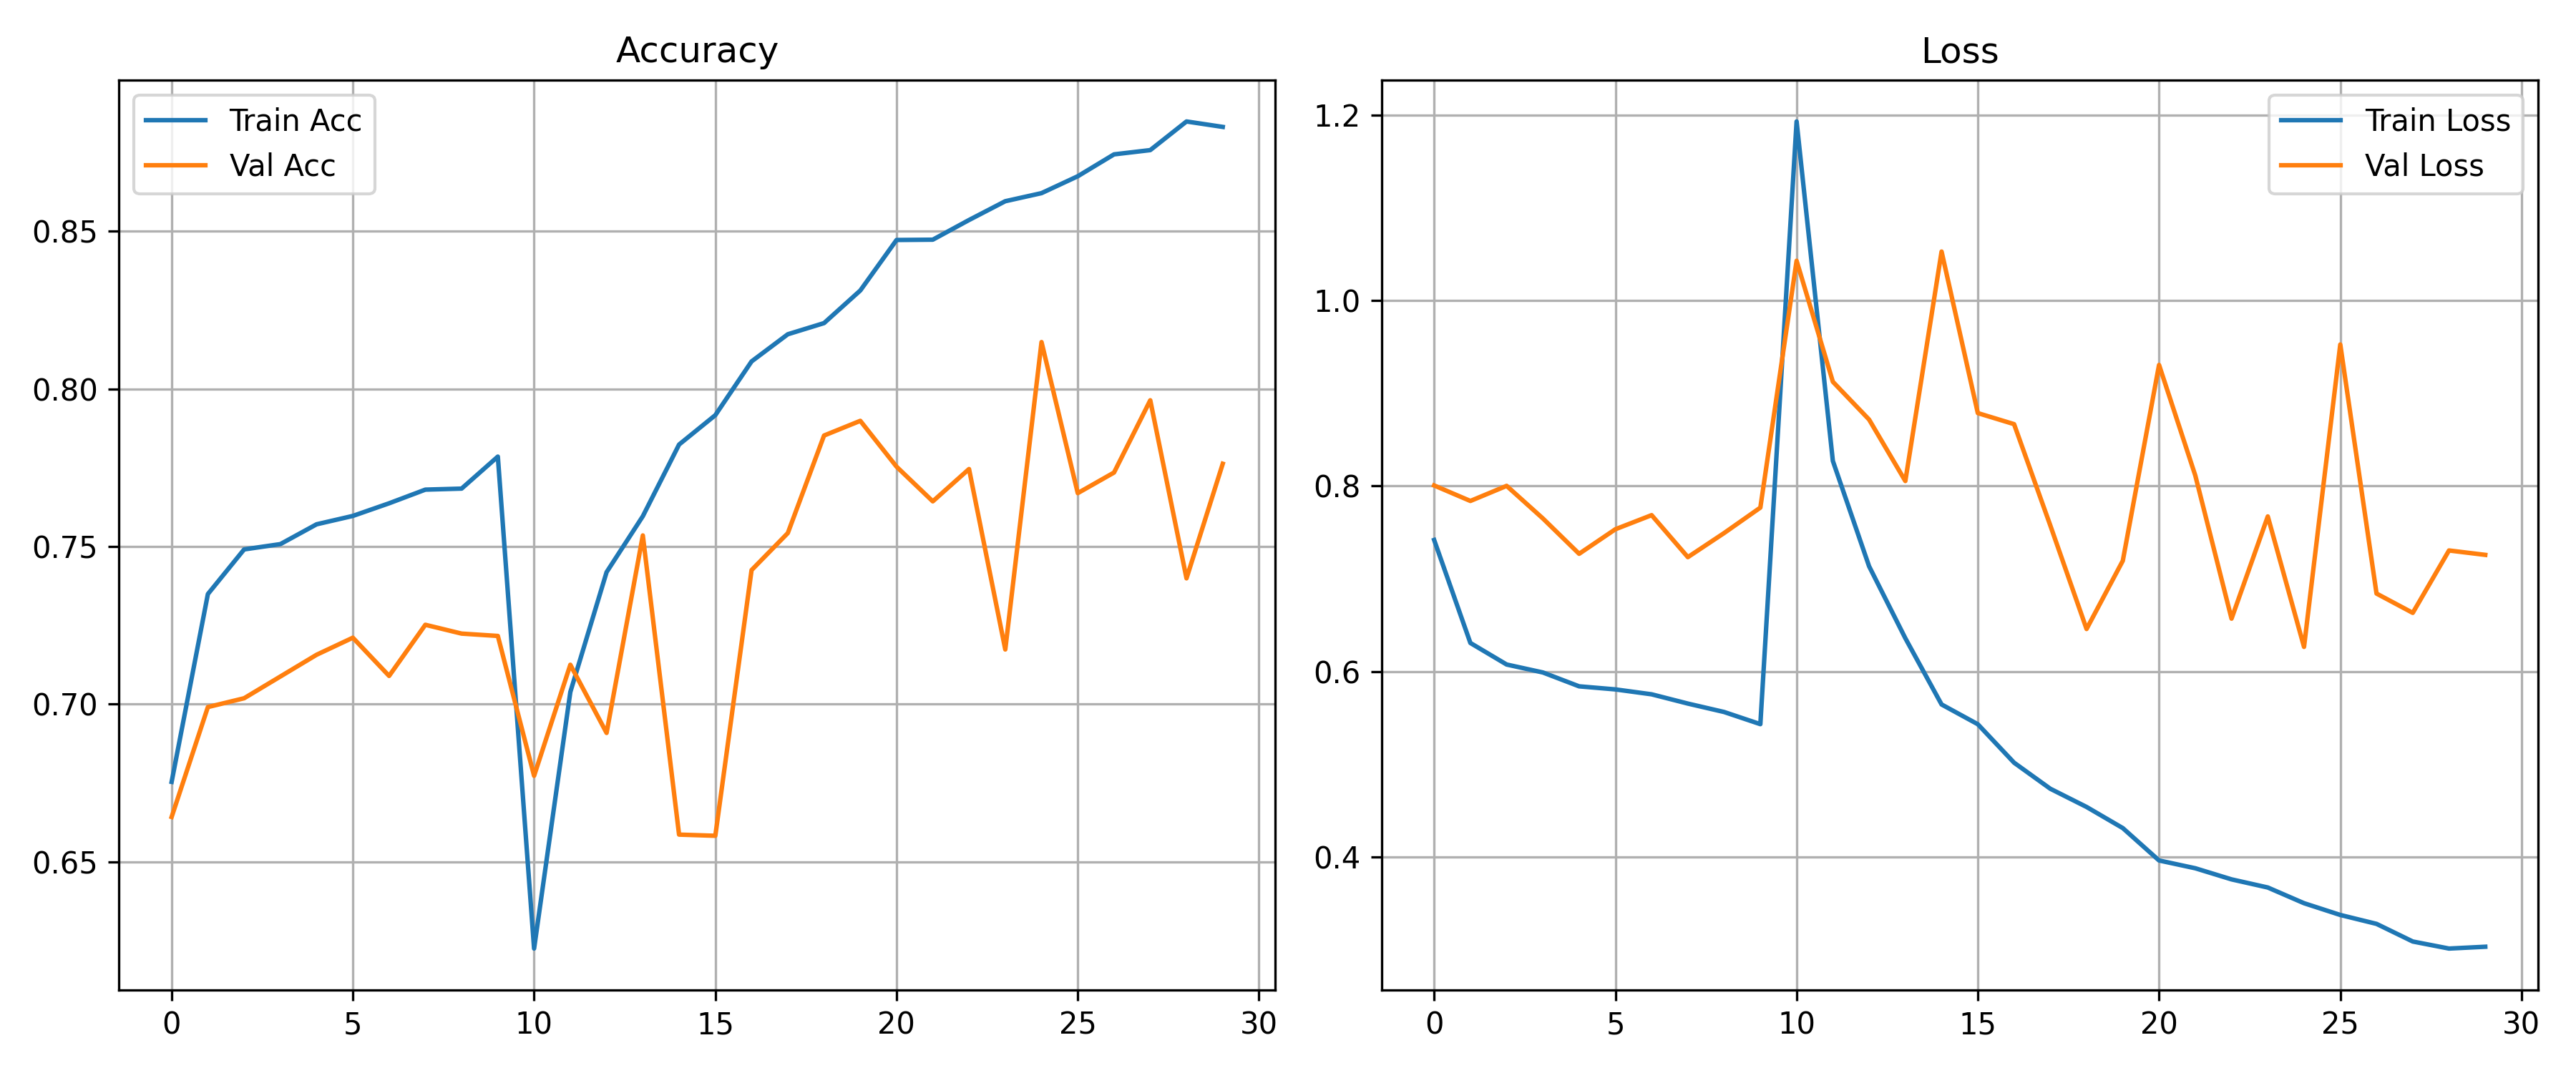

In [5]:
print("Baseline Training Curve:")
display(IPImage('../results/plots/baseline_fast_training.png'))

print("ResNet50 Training Curve:")
display(IPImage('../results/plots/resnet50_training.png'))


In [ ]:
## 3. Per-Class Metrics Comparison
# Extract precision, recall, and F1-score for each class.


In [6]:
classes = ["non_organic", "organic", "recyclable"]

baseline_metrics = {cls: baseline['classification_report'][cls] for cls in classes}
advanced_metrics = {cls: advanced['classification_report'][cls] for cls in classes}

pd.DataFrame([
    {
        "Class": cls.title().replace("_", " "),
        "Baseline F1": baseline_metrics[cls]['f1-score'],
        "ResNet50 F1": advanced_metrics[cls]['f1-score']
    }
    for cls in classes
])


,Class,Baseline F1,ResNet50 F1
0,Non Organic,0.651541,0.634941
1,Organic,0.792351,0.960559
2,Recyclable,0.675866,0.722526


In [ ]:
## 5. Per-Class F1-Score Comparison (Bar Chart)


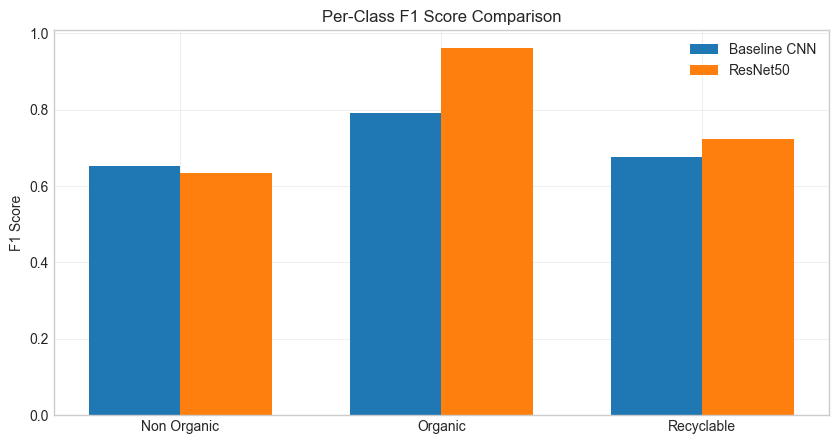

In [7]:
x = np.arange(len(classes))
width = 0.35

baseline_f1 = [baseline_metrics[c]["f1-score"] for c in classes]
advanced_f1 = [advanced_metrics[c]["f1-score"] for c in classes]

plt.figure(figsize=(10,5))
plt.bar(x - width/2, baseline_f1, width, label="Baseline CNN")
plt.bar(x + width/2, advanced_f1, width, label="ResNet50")

plt.xticks(x, [c.replace("_", " ").title() for c in classes])
plt.ylabel("F1 Score")
plt.title("Per-Class F1 Score Comparison")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


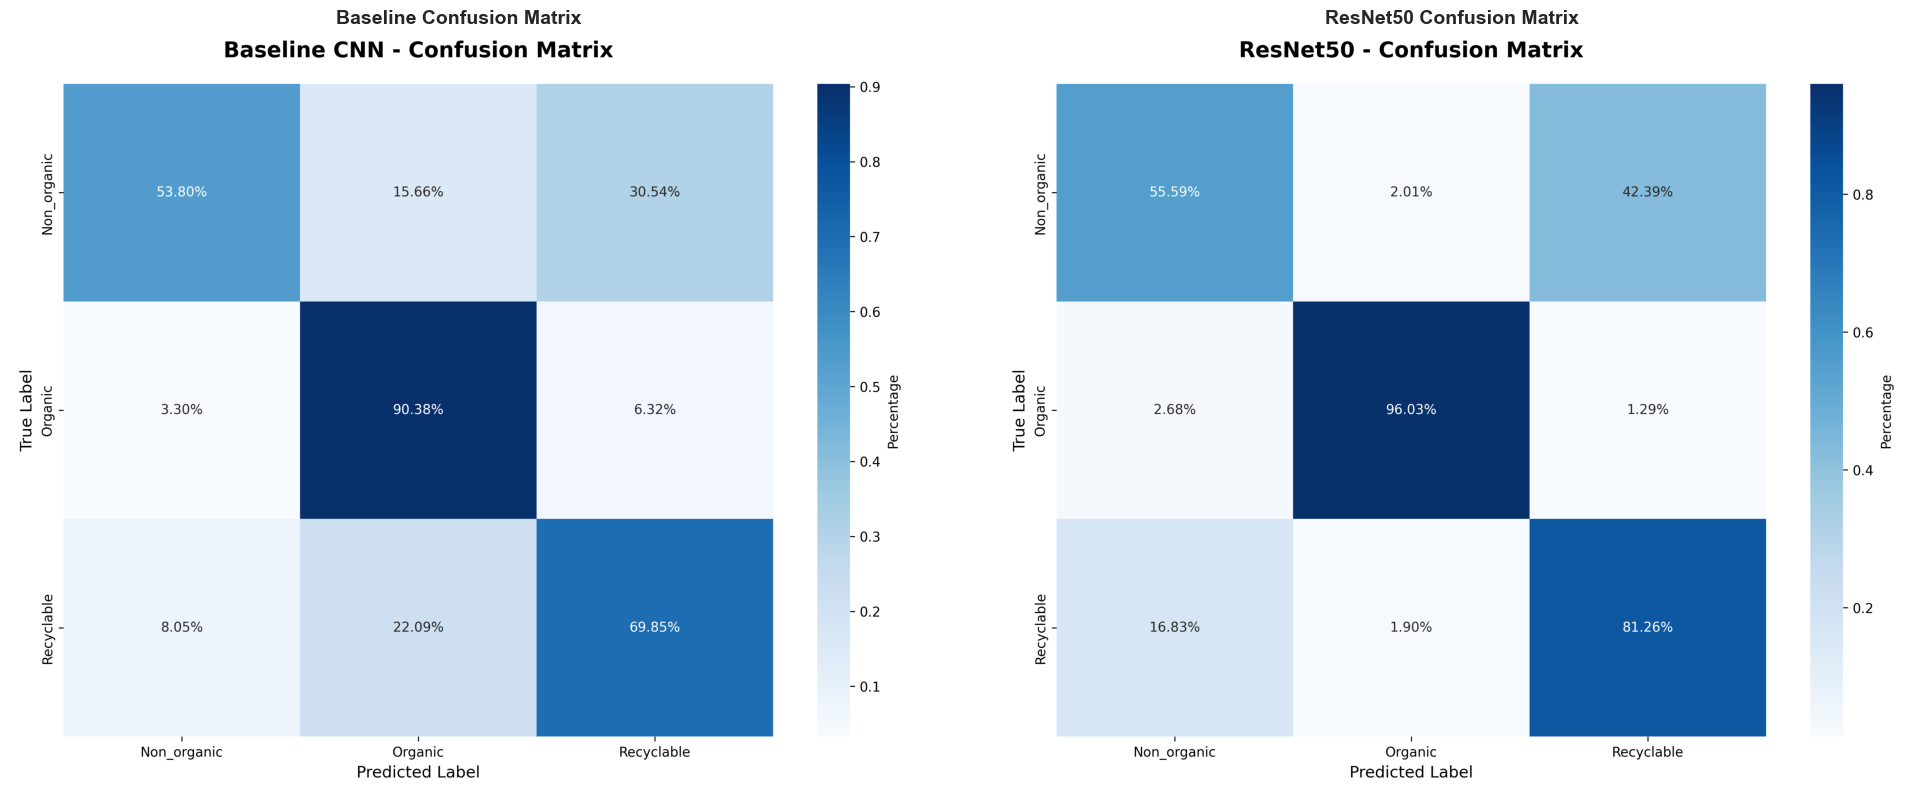

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Create a wide figure
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  # <-- Increase width here

# Baseline confusion matrix
axes[0].imshow(mpimg.imread('../results/plots/baseline_cm.png'))
axes[0].set_title("Baseline Confusion Matrix", fontsize=14, fontweight='bold')
axes[0].axis('off')

# ResNet50 confusion matrix
axes[1].imshow(mpimg.imread('../results/plots/advanced_cm.png'))
axes[1].set_title("ResNet50 Confusion Matrix", fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()


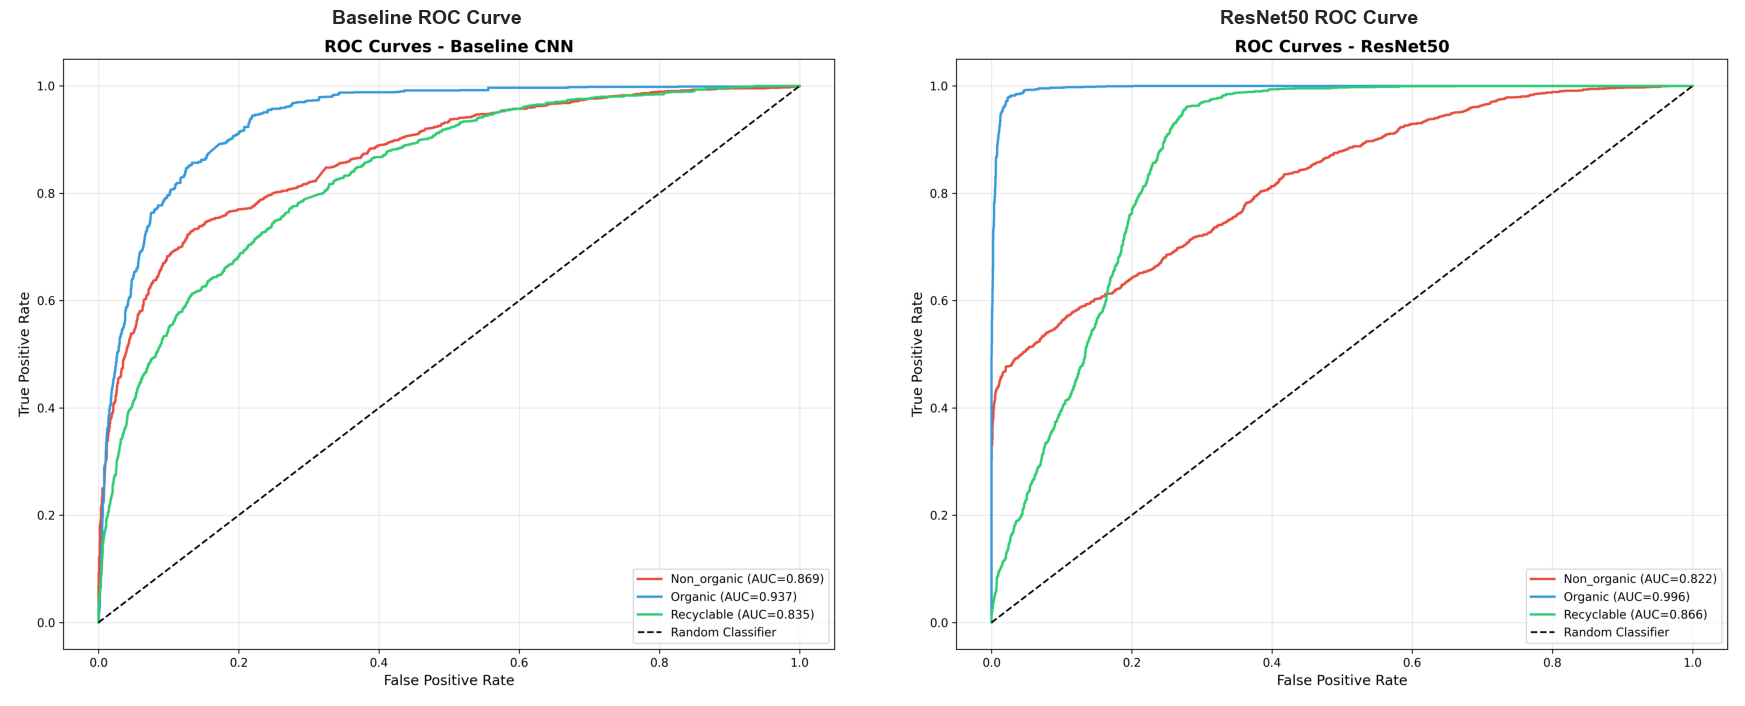

In [13]:
## 7. ROC Curves
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Baseline ROC
axes[0].imshow(mpimg.imread('../results/plots/baseline_roc.png'))
axes[0].set_title("Baseline ROC Curve", fontsize=14, fontweight='bold')
axes[0].axis('off')

# Advanced ROC
axes[1].imshow(mpimg.imread('../results/plots/advanced_roc.png'))
axes[1].set_title("ResNet50 ROC Curve", fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()


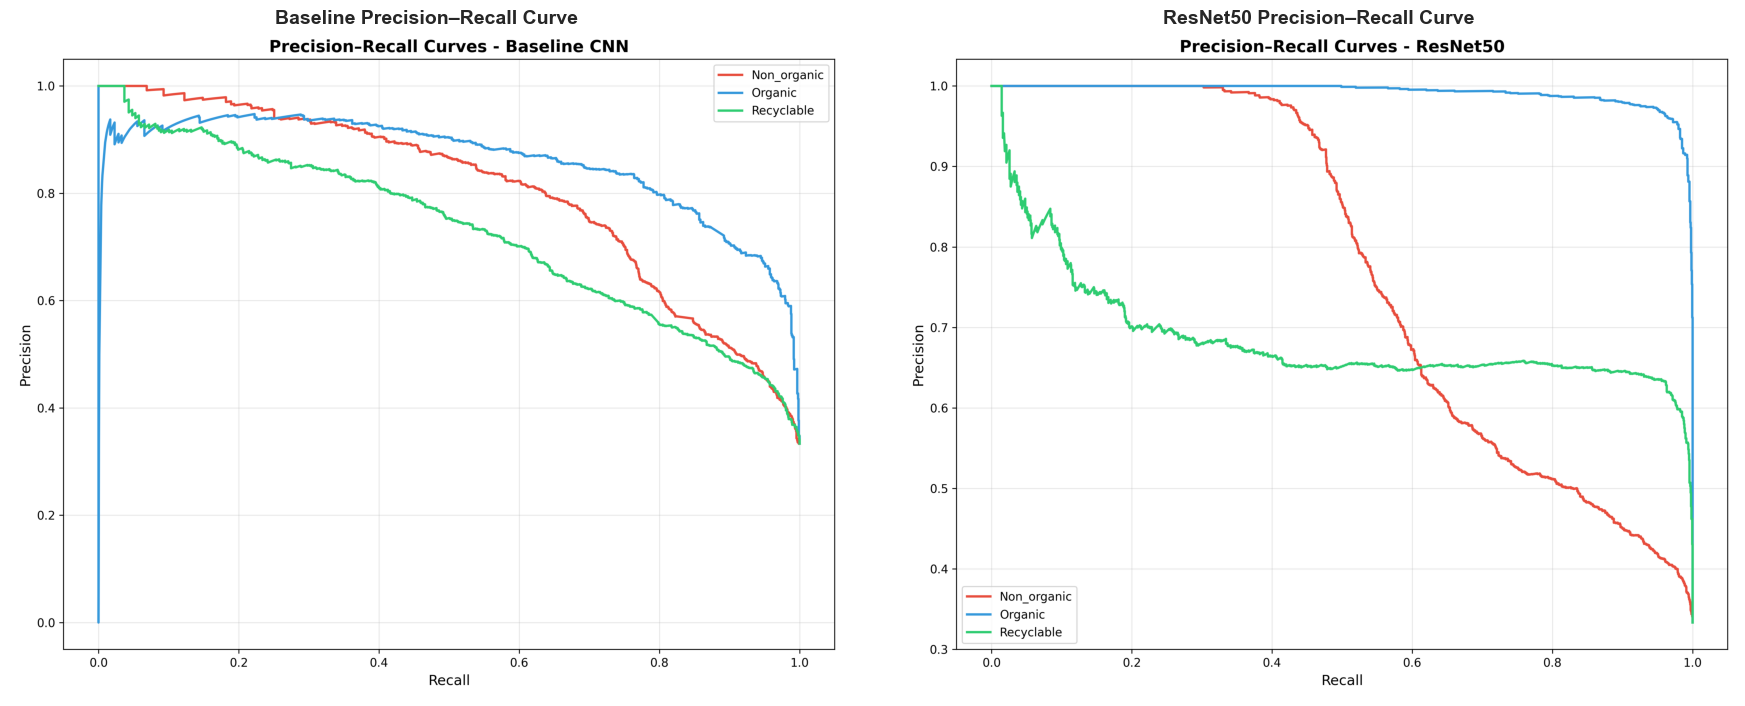

In [14]:
## 8. Precision–Recall Curves
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Baseline PR
axes[0].imshow(mpimg.imread('../results/plots/baseline_pr.png'))
axes[0].set_title("Baseline Precision–Recall Curve", fontsize=14, fontweight='bold')
axes[0].axis('off')

# Advanced PR
axes[1].imshow(mpimg.imread('../results/plots/advanced_pr.png'))
axes[1].set_title("ResNet50 Precision–Recall Curve", fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()


In [11]:
## 11. Dataset Statistics
with open('../data/processed/mapping_info.json') as f:
    mapping = json.load(f)

mapping


{'class_mapping': {'organic': ['biological'],
  'recyclable': ['paper',
   'cardboard',
   'metal',
   'plastic',
   'white-glass',
   'green-glass',
   'brown-glass'],
  'non_organic': ['trash', 'shoes', 'clothes', 'battery']},
 'original_counts': {'organic': 985, 'recyclable': 5586, 'non_organic': 8944},
 'balanced_counts': {'organic': 8944, 'recyclable': 8944, 'non_organic': 8944},
 'total_original_images': 15515}